<a href="https://colab.research.google.com/github/TiagoHarari/DataAnalysis_course/blob/main/4-Data_Wrangling_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/4_Data_Wrangling_Avanzado/ejercicio/ejercicio.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Ejercicio Pandas IV: Informe macroeconómico de Argentina

La consultora "Nuevos Horizontes" quiere hacer un análisis del mercado argentino para entender como ha evolucionado en los últimos años. Van a analizar dos indicadores macroeconómicos principales: el **IPC: Índice de Precios al Consumidor** (para medir inflación) y el tipo de cambio (**cotización del dólar**).

## IPC: Índice de Precios al Consumidor

Para más información sobre el IPC pueden visitar la siguiente página del INDEC: https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31

La base de IPC a analizar tiene como base diciembre de 2016, al cual le corresponde el índice 100. Los precios se encuentran con cuatro niveles de apertura:

* General: Indice de Precios de toda la canasta de bienes y servicios considerada en el análisis

* Estacional: Bienes y servicios con comportamiento estacional. Por ejemplo: frutas y verduras

* Regulados: Bienes y servicios cuyos precios están sujetos a regulación o tienen alto componente impositivo. Por ejemplo: electricidad

* Núcleo: : Resto de los grupos del IPC

Su jefa quiere analizar el comportamiento de los cuatro niveles de apertura del indice de precios en los años que componen el dataset. Para eso le pide que obtenga el promedio, mediana e índice máximo anuales para cada nivel de apertura. Luego, de ser posible, graficar la evolución anual del índice medio a nivel general.

**Pasos sugeridos:**

    1) Leer los datos del IPC.

    2) Modificar la tabla para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

    3) Convertir la variable de fecha al formato date-time y extraer el año y el mes.

    *Ayuda*: Vas a tener que utilizar el argumento format en la función to_datetime de pandas. En esta página vas a poder encontrar los códigos de formato o directivas necesarios para convertir las fechas: https://docs.python.org/es/3/library/datetime.html#strftime-and-strptime-behavior

    4) Calcular el indice promedio, mediano y maximo por año para cada nivel de apertura.

    5) Graficar.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1) Leer los datos del IPC.**

In [74]:
ipc_df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/4_Data_Wrangling_Avanzado/ejercicios/ipc_indec.csv')

In [75]:
ipc_df.head()

,Apertura,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,...,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20
0,Nivel general,100.0,101.6,103.7,106.1,109.0,110.5,111.8,113.8,115.4,...,253.7,262.1,273.2,283.4,289.8,295.7,305.6,310.1,314.9,322.0
1,Estacional,100.0,101.7,102.3,104.8,108.2,109.1,110.1,110.6,111.8,...,217.0,223.2,239.6,244.7,253.6,260.0,272.7,285.9,299.3,313.6
2,Núcleo,100.0,101.5,103.2,105.2,107.4,109.2,110.7,112.6,114.2,...,250.5,260.0,270.4,280.3,287.2,294.0,303.2,308.4,313.3,320.6
3,Regulados,100.0,101.8,105.9,110.0,114.5,115.7,116.7,119.4,121.1,...,284.7,290.5,301.6,315.5,319.1,321.3,331.9,329.7,329.4,331.8


**2) Modificar la tabla** para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

In [76]:
ipc = pd.melt(ipc_df,
                      id_vars="Apertura",  # V
                      var_name="Fecha",
                      value_name="Indice")

In [77]:
ipc.head()

,Apertura,Fecha,Indice
0,Nivel general,Dec-16,100.0
1,Estacional,Dec-16,100.0
2,Núcleo,Dec-16,100.0
3,Regulados,Dec-16,100.0
4,Nivel general,Jan-17,101.6


**3)** Convertir la **variable de fecha** al formato date-time y extraer el año y el mes


In [78]:
# formato datetime, argumento format para extraer anio y mes
ipc["Fecha"] = pd.to_datetime(ipc["Fecha"], format ="%b-%y")

In [79]:
ipc.head()

,Apertura,Fecha,Indice
0,Nivel general,2016-12-01,100.0
1,Estacional,2016-12-01,100.0
2,Núcleo,2016-12-01,100.0
3,Regulados,2016-12-01,100.0
4,Nivel general,2017-01-01,101.6


Hasta este punto, tenemos un DataFrame que cumple con los tidydata.La variable Fecha en formato datetime

In [80]:
# Creamos el índice temporal
ipc = ipc.set_index("Fecha")

# Extraemos año y mes
ipc['Año'] = ipc.index.year
ipc['Mes'] = ipc.index.month

Ahora, tenemos un indice que es fecha y variables de apertura, indice, Año y Mes.

**4)** Calcular el **indice promedio, mediano y maximo** por año para cada nivel de apertura.

In [81]:
# Groupby para agregar funciones a la columna de apertura
# por Año (variable) y apertura (variable)
ipc.groupby(["Apertura", "Año"]).agg(
    {"Indice": ['mean', 'median', 'max']})


Indice               
                          mean  median    max
Apertura      Año                            
Estacional    2016  100.000000  100.00  100.0
              2017  111.366667  110.35  121.5
              2018  139.958333  137.05  164.3
              2019  198.083333  189.15  244.7
              2020  280.850000  279.30  313.6
Nivel general 2016  100.000000  100.00  100.0
              2017  112.891667  112.80  124.8
              2018  151.583333  147.05  184.3
              2019  232.758333  228.00  283.4
              2020  306.350000  307.85  322.0
Núcleo        2016  100.000000  100.00  100.0
              2017  111.491667  111.65  121.1
              2018  146.825000  142.75  178.9
              2019  228.291667  222.55  280.3
              2020  304.450000  305.80  320.6
Regulados     2016  100.000000  100.00  100.0
              2017  118.283333  118.05  138.7
              2018  173.716667  166.85  212.9
              2019  266.600000  267.40  315.5
              2020  327.200000  329.55  331.9

**Se hace un agrupamiento de las columnas Anio y Apertura. A ese agrupamiento se les agrega (agg) mean, median, max de la columna Indice**

**5) Graficar**

Es necesario comprender que tipo de grafico es util de usar para representar la informacion.

<Axes: xlabel='Fecha'>

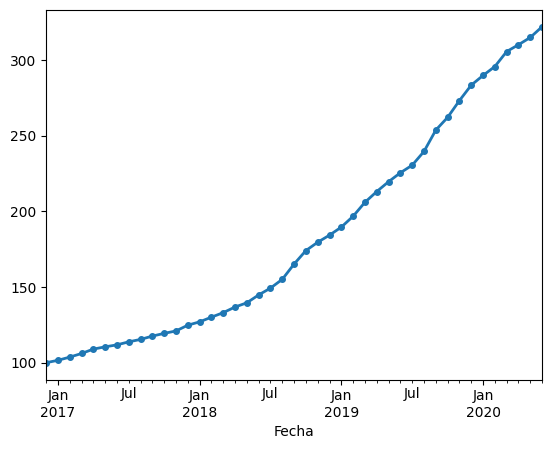

In [82]:
# Mensual
ipc[ipc.Apertura == 'Nivel general'].Indice.plot(style='-o', linewidth=2, ms=4)

**Grafico de barras del nivel general promedio anual**

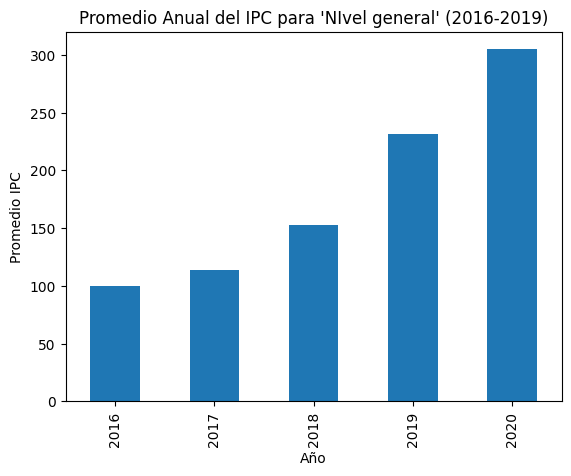

In [85]:
promedio = ipc.groupby("Año")["Indice"].mean()

barras = promedio.plot(kind="bar", title="Promedio Anual del IPC para 'NIvel general' (2016-2019)", ylabel="Promedio IPC", xlabel="Año")

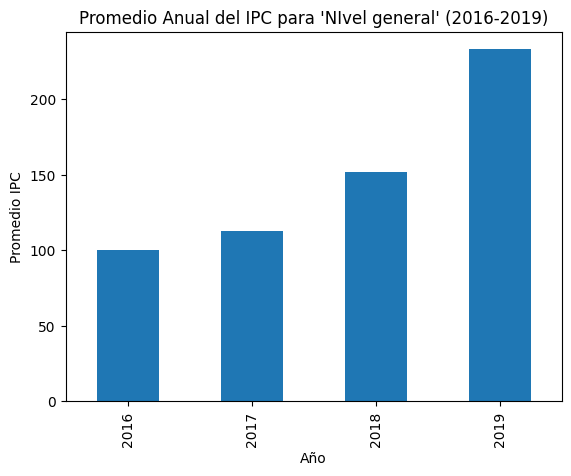

In [72]:
# nivel general
nivel_general = ipc[ipc["Apertura"] == "Nivel general"]

# nivel general para los anios
nivel_general = nivel_general[nivel_general["Año"].isin([2016, 2017, 2018, 2019])]

# promedio del indice de cada anio
promedio_anual = nivel_general.groupby("Año")["Indice"].mean()

# Crear el gráfico de barras si promedio_anual no está vacío
if not promedio_anual.empty:
    promedio_anual.plot(kind="bar", title="Promedio Anual del IPC para 'NIvel general' (2016-2019)", ylabel="Promedio IPC", xlabel="Año")
    plt.show()
else:
    print("No hay datos disponibles para 'NIvel general' en los años 2016-2019.")

### Dolar

La base de cotización de dolar traer los precios de compra y venta oficiales de la divisa en Argentina desde el 01-06-2015 hasta el 03-08-2020 según el portal Ámbito Financiero.

Para proseguir con el informe se quiere obtener la cotización media diaria (promedio entre compra y venta) y obtener la mediana mensual con su respectivo gráfico. Adicionalmente, se quiere encontrar el top 5 de los días con mayores aumentos porcentuales en el tipo de cambio para la misma ventana de tiempo que se analizó el IPC (desde 01-12-2016 hasta el 30-06-2020)

**Pasos sugeridos:**

    1) Leer los datos de la cotización del dolar

    2) Crear una variable que compute el valor promedio entre compra y venta por día

    3) Convertir la fecha de un dato tipo string a un objeto datetime (to_datetime). Construir las variables de año y mes.

    4) Calcular el promedio mensual y graficar (recordar ordenar en forma ascendente la fecha)

    5) Ordenar de manera ascendente por fecha, filtrar las fechas señaladas y calcular la variación porcentual diaria en la cotización

    6) Hallar los 5 días con mayor variación en la cotización.

**1)** Leer los datos de la cotización del dolar

In [86]:
dolar_df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/4_Data_Wrangling_Avanzado/ejercicios/dolar_oficial_ambito.csv')

In [87]:
dolar_df.head()

,fecha,compra,venta
0,05-08-2020,71.89,76.89
1,04-08-2020,71.69,76.69
2,03-08-2020,71.64,76.64
3,31-07-2020,71.39,76.39
4,30-07-2020,71.27,76.27


**2)** Crear una variable que compute el valor **promedio** entre compra y venta por día

In [94]:
# loc[filas, columnas]
dolar_df["media_diaria"] = dolar_df.loc[:, ["compra", "venta"]].mean(axis=1) #mean.(axis=1) promedio fila por fila
dolar_df.head()

,fecha,compra,venta,media_diaria
0,05-08-2020,71.89,76.89,74.39
1,04-08-2020,71.69,76.69,74.19
2,03-08-2020,71.64,76.64,74.14
3,31-07-2020,71.39,76.39,73.89
4,30-07-2020,71.27,76.27,73.77


**3)** Convertir la **fecha** de un dato tipo string a un objeto datetime (to_datetime) y construir las variables de año y mes

In [101]:
dolar_df["fecha"] = pd.to_datetime(dolar_df["fecha"], dayfirst=True)

dolar_df['Año'] = dolar_df.fecha.dt.year # columna Año
dolar_df['Mes'] = dolar_df.fecha.dt.month # columna mes

dolar_df.head()

,fecha,compra,venta,media_diaria,Año,Mes
0,2020-08-05,71.89,76.89,74.39,2020,8
1,2020-08-04,71.69,76.69,74.19,2020,8
2,2020-08-03,71.64,76.64,74.14,2020,8
3,2020-07-31,71.39,76.39,73.89,2020,7
4,2020-07-30,71.27,76.27,73.77,2020,7


**4)** Calcular el promedio mensual y graficar.

In [111]:
# promedio mensual
dolar_mensual = dolar_df.groupby(['Año', 'Mes']).agg({'media_diaria': 'median'}).reset_index()

# para cada ANIO y MES, calculamos la mediana de media_diaria
# calcular la mediana de un conjunto de promedios es la media



<Axes: >

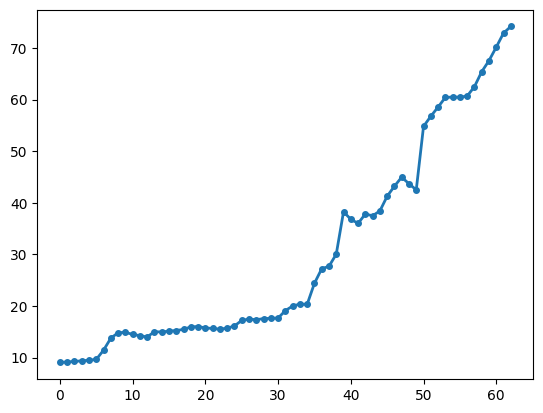

In [110]:
dolar_mensual.media_diaria.plot(style='-o', linewidth=2, ms=4)

**5)** Ordenar de manera ascendente por fecha, filtrar las fechas señaladas y calcular la variación porcentual diaria en la cotización

Para calcular la variación porcentual debemos realizar la siguiente cuenta:

$VariacionPorcentual = \frac{CotizacionHoy - CotizacionAyer}{CotizacionAyer}*100$

In [113]:
dolar_df.head()

,fecha,compra,venta,media_diaria,Año,Mes
0,2020-08-05,71.89,76.89,74.39,2020,8
1,2020-08-04,71.69,76.69,74.19,2020,8
2,2020-08-03,71.64,76.64,74.14,2020,8
3,2020-07-31,71.39,76.39,73.89,2020,7
4,2020-07-30,71.27,76.27,73.77,2020,7




---



**Nueva tabla, igual pero con fecha en orden**

In [116]:
# filtrar las fechas señaladas
filtro = dolar_df[dolar_df['fecha'].between("01-12-2016", "30-06-2020")]

# Ordenar de manera ascendente por fecha
filtro = filtro.sort_values('fecha')

**Diferencia diaria (Diff)**

In [117]:
# variación porcentual diaria en la cotización
filtro["diferencia_diaria"] = filtro['media_diaria'].diff(1)

In [118]:
filtro.head()

,fecha,compra,venta,media_diaria,Año,Mes,diferencia_diaria
1115,2016-01-12,13.45,13.85,13.65,2016,1,NaN
1114,2016-01-13,13.46,13.86,13.66,2016,1,0.01
1113,2016-01-14,13.28,13.68,13.48,2016,1,-0.18
1112,2016-01-15,13.36,13.76,13.56,2016,1,0.08
1111,2016-01-18,13.37,13.77,13.57,2016,1,0.01


**Cotizacion anterior (shift)**

In [121]:
filtro['cotizacion_anterior'] = filtro['media_diaria'].shift(periods=1)

**Valor Promedio Diario**

In [124]:
# valor promedio diario
filtro['variacion_diaria'] = round(
    filtro['diferencia_diaria'] / filtro['cotizacion_anterior']*100, 2)

filtro.head()

,fecha,compra,venta,media_diaria,Año,Mes,diferencia_diaria,cotizacion_anterior,variacion_diaria
1115,2016-01-12,13.45,13.85,13.65,2016,1,NaN,NaN,NaN
1114,2016-01-13,13.46,13.86,13.66,2016,1,0.01,13.65,0.07
1113,2016-01-14,13.28,13.68,13.48,2016,1,-0.18,13.66,-1.32
1112,2016-01-15,13.36,13.76,13.56,2016,1,0.08,13.48,0.59
1111,2016-01-18,13.37,13.77,13.57,2016,1,0.01,13.56,0.07


In [126]:
# el primer Nan, lo reemplazamos
filtro = filtro.fillna(0)
filtro.head()

,fecha,compra,venta,media_diaria,Año,Mes,diferencia_diaria,cotizacion_anterior,variacion_diaria
1115,2016-01-12,13.45,13.85,13.65,2016,1,0.00,0.00,0.00
1114,2016-01-13,13.46,13.86,13.66,2016,1,0.01,13.65,0.07
1113,2016-01-14,13.28,13.68,13.48,2016,1,-0.18,13.66,-1.32
1112,2016-01-15,13.36,13.76,13.56,2016,1,0.08,13.48,0.59
1111,2016-01-18,13.37,13.77,13.57,2016,1,0.01,13.56,0.07


**6)** Hallar los 5 días con mayor variación en la cotización.

In [130]:
# 5 dias con mayor variacion_diaria
filtro.sort_values("variacion_diaria", ascending=False).head(5)

,fecha,compra,venta,media_diaria,Año,Mes,diferencia_diaria,cotizacion_anterior,variacion_diaria
238,2019-08-12,51.23,57.30,54.265,2019,8,8.815,45.450,19.39
467,2018-08-30,37.87,39.87,38.870,2018,8,4.990,33.880,14.73
236,2019-08-14,57.18,62.18,59.680,2019,8,4.575,55.105,8.30
468,2018-08-29,33.28,34.48,33.880,2018,8,2.310,31.570,7.32
548,2018-05-03,22.60,23.00,22.800,2018,5,1.480,21.320,6.94


In [131]:
# el método .nlargest() se utiliza para obtener las n filas con los valores más altos
filtro.nlargest(5, "variacion_diaria")

,fecha,compra,venta,media_diaria,Año,Mes,diferencia_diaria,cotizacion_anterior,variacion_diaria
238,2019-08-12,51.23,57.30,54.265,2019,8,8.815,45.450,19.39
467,2018-08-30,37.87,39.87,38.870,2018,8,4.990,33.880,14.73
236,2019-08-14,57.18,62.18,59.680,2019,8,4.575,55.105,8.30
468,2018-08-29,33.28,34.48,33.880,2018,8,2.310,31.570,7.32
548,2018-05-03,22.60,23.00,22.800,2018,5,1.480,21.320,6.94
